In [10]:
import matplotlib.pyplot as plt
import numpy as np

El mapa logístico constituye una ecuación a tiempos discretos en donde $X=[0,1]$,

\begin{align}
x_{t+1} &= f(x_t) \\
        &= rx_t(1 - x_t)
\end{align}


y $r\in [0,4]$ es un parámetro.

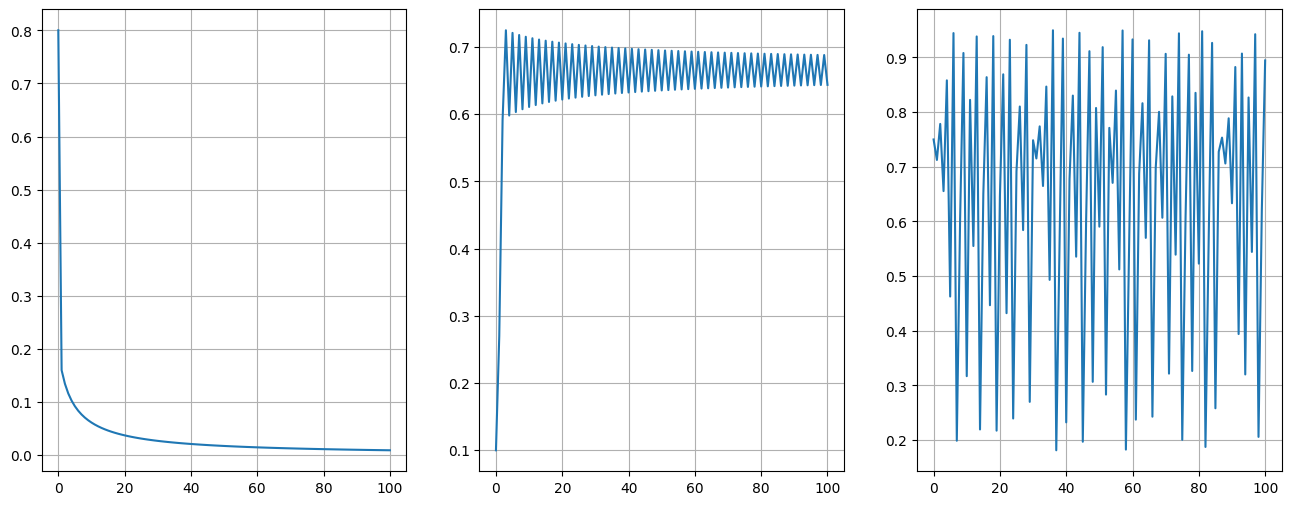

In [11]:
import matplotlib.pyplot as plt
from typing import Callable, List

def f(xt: float, r: float) -> float: 
    return r * xt * (1 - xt)

def get_evol(steps: int, f: Callable[[float, float], float], r: float, x0: float) -> List[float]:
    values = [x0]
    for i in range(steps):
        values.append(f(values[i], r))
    return values

x_0s = [0.8, 0.1, 0.75]
rs = [1, 3, 3.8]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))  # 1 fila, 3 columnas de subplots

for i in range(3):
    v = get_evol(100, f, rs[i], x_0s[i])
    ax[i].plot(v)  # Corregido: usar ax[i] en lugar de ax[0][i]

    ax[i].grid()
plt.show()


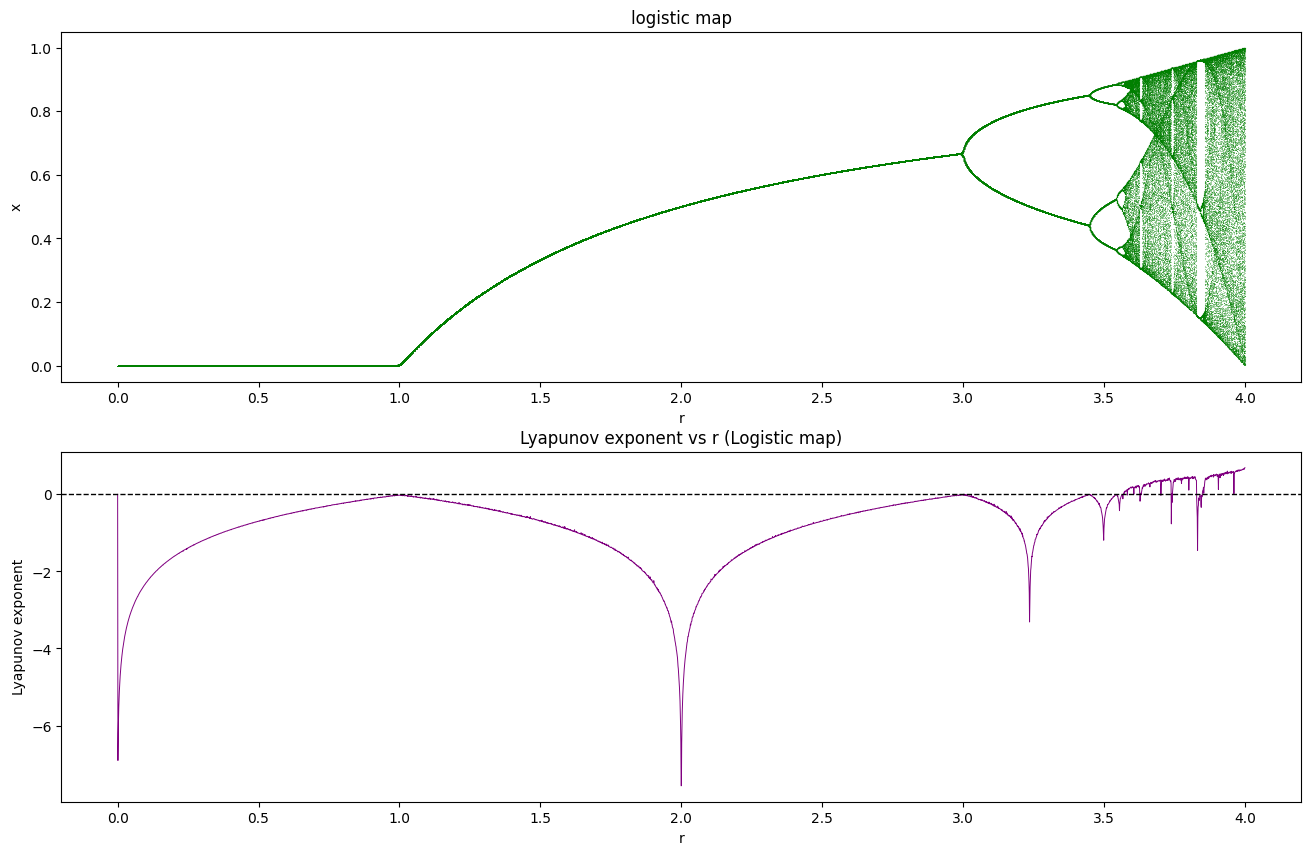

In [43]:
#Bifurcation

rs = np.linspace(0, 4, 4000)
time_iterations_per_r = 400
limit = 150
values = np.zeros(time_iterations_per_r)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

#set random initial condition (x0) between 0 and 1
values[0] = np.random.rand()

for r in rs:
    for i in range(time_iterations_per_r - 1):
        values[i+1] = f(values[i], r)
    
    ax[0].plot([r] * limit, values[time_iterations_per_r - limit :],"g*", markersize=0.05)
ax[0].set(xlabel="r", ylabel="x", title="logistic map")

#Lyapunov

lyapunov = np.zeros_like(rs)

# Iterar sobre cada valor de r
for i, r in enumerate(rs):
    x = np.random.rand()  # Condición inicial
    sum_lyapunov = 0

    for j in range(time_iterations_per_r):
        # Derivada de la función logística
        derivative = abs(r * (1 - 2 * x))
        if derivative > 0:  # Evitar logaritmos de números negativos o cero
            sum_lyapunov += np.log(derivative)
        
        # Ecuación logística
        x = f(x,r)
    
    # Promedio del exponente de Lyapunov en las últimas iteraciones
    lyapunov[i] = sum_lyapunov / time_iterations_per_r

ax[1].plot(rs, lyapunov, lw=0.7, color="purple")
ax[1].axhline(0, linestyle='--', color='k', lw=1)
ax[1].set(xlabel="r", ylabel="Lyapunov exponent", title="Lyapunov exponent vs r (Logistic map)")

plt.show()

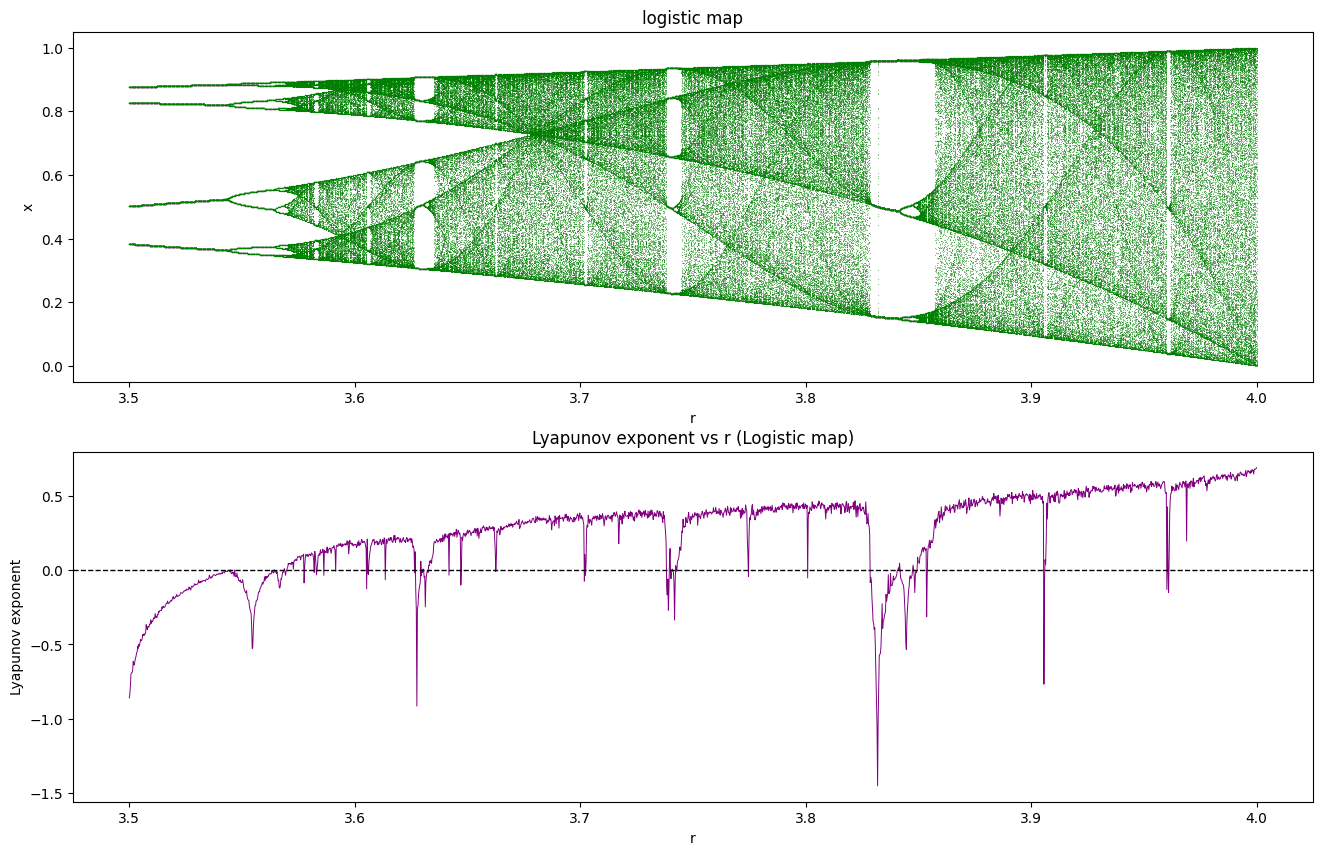

In [45]:
rs = np.linspace(3.5, 4, 2000)
time_iterations_per_r = 400
limit = 200
values = np.zeros(time_iterations_per_r)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

#set random initial condition (x0) between 0 and 1
values[0] = np.random.rand()

for r in rs:
    for i in range(time_iterations_per_r - 1):
        values[i+1] = f(values[i], r)
    
    ax[0].plot([r] * limit, values[time_iterations_per_r - limit :],"g*", markersize=0.07)
ax[0].set(xlabel="r", ylabel="x", title="logistic map")

lyapunov = np.zeros_like(rs)

# Iterar sobre cada valor de r
for i, r in enumerate(rs):
    x = np.random.rand()  # Condición inicial
    sum_lyapunov = 0

    for j in range(time_iterations_per_r):
        # Derivada de la función logística
        derivative = abs(r * (1 - 2 * x))
        if derivative > 0:  # Evitar logaritmos de números negativos o cero
            sum_lyapunov += np.log(derivative)
        
        # Ecuación logística
        x = f(x,r)
    
    # Promedio del exponente de Lyapunov en las últimas iteraciones
    lyapunov[i] = sum_lyapunov / time_iterations_per_r

ax[1].plot(rs, lyapunov, lw=0.7, color="purple")
ax[1].axhline(0, linestyle='--', color='k', lw=1)
ax[1].set(xlabel="r", ylabel="Lyapunov exponent", title="Lyapunov exponent vs r (Logistic map)")

plt.show()

When Lyapunov exponent is greater than 0 the system is chaotic, when the Lyapunov exponent is smaller than 0 the system is stable

[Text(0.5, 0, 'r'), Text(0, 0.5, 'x'), Text(0.5, 1.0, 'logistic map')]

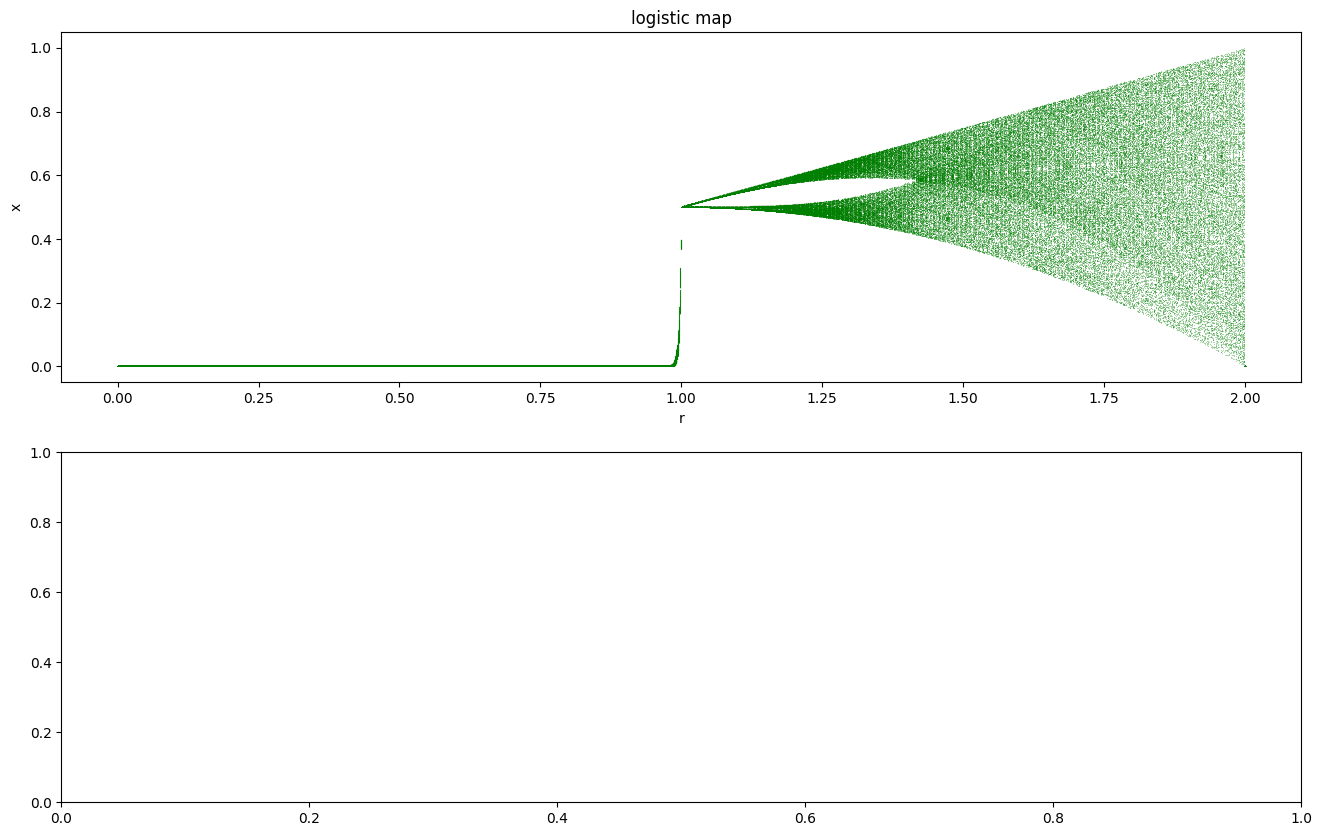

In [46]:
def carp_map_fctn(xt, r):
    if xt <= 0.5:
        return r*xt
    elif xt > 0.5 and xt <= 1:
        return r*(1-xt)
    else: return ValueError

#Bifurcation

rs = np.linspace(0, 2, 2000)
time_iterations_per_r = 400
limit = 150
values = np.zeros(time_iterations_per_r)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

#set random initial condition (x0) between 0 and 1
values[0] = np.random.rand()

for r in rs:
    for i in range(time_iterations_per_r - 1):
        values[i+1] = carp_map_fctn(values[i], r)
    
    ax[0].plot([r] * limit, values[time_iterations_per_r - limit :],"g*", markersize=0.05)
ax[0].set(xlabel="r", ylabel="x", title="logistic map")

#Lyapunov

# lyapunov = np.zeros_like(rs)

# # Iterar sobre cada valor de r
# for i, r in enumerate(rs):
#     x = np.random.rand()  # Condición inicial
#     sum_lyapunov = 0

#     for j in range(time_iterations_per_r):
#         # Derivada de la función logística
#         derivative = abs(r * (1 - 2 * x))
#         if derivative > 0:  # Evitar logaritmos de números negativos o cero
#             sum_lyapunov += np.log(derivative)
        
#         # Ecuación logística
#         x = f(x,r)
    
#     # Promedio del exponente de Lyapunov en las últimas iteraciones
#     lyapunov[i] = sum_lyapunov / time_iterations_per_r

# ax[1].plot(rs, lyapunov, lw=0.7, color="purple")
# ax[1].axhline(0, linestyle='--', color='k', lw=1)
# ax[1].set(xlabel="r", ylabel="Lyapunov exponent", title="Lyapunov exponent vs r (Logistic map)")

# plt.show()

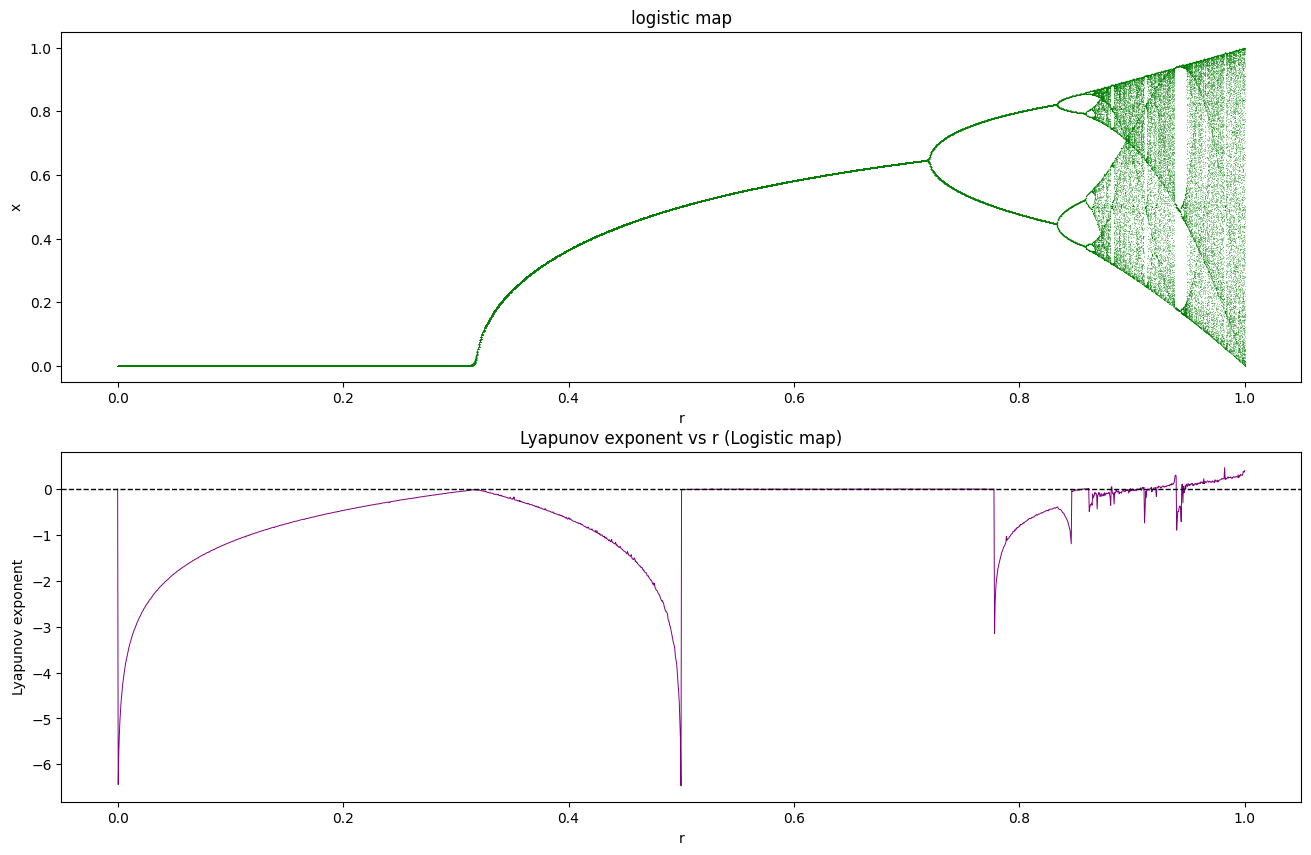

In [47]:
def sin_map_fctn(xt, r):
    return r * np.sin(np.pi*xt)

#Bifurcation

rs = np.linspace(0, 1, 2000)
time_iterations_per_r = 400
limit = 150
values = np.zeros(time_iterations_per_r)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

#set random initial condition (x0) between 0 and 1
values[0] = np.random.rand()

for r in rs:
    for i in range(time_iterations_per_r - 1):
        values[i+1] = sin_map_fctn(values[i], r)
    
    ax[0].plot([r] * limit, values[time_iterations_per_r - limit :],"g*", markersize=0.05)
ax[0].set(xlabel="r", ylabel="x", title="logistic map")

#Lyapunov

lyapunov = np.zeros_like(rs)

# Iterar sobre cada valor de r
for i, r in enumerate(rs):
    x = np.random.rand()  # Condición inicial
    sum_lyapunov = 0

    for j in range(time_iterations_per_r):
        # Derivada de la función logística
        derivative = np.pi * r * np.cos(np.pi * x)
        if derivative > 0:  # Evitar logaritmos de números negativos o cero
            sum_lyapunov += np.log(derivative)
        
        # Ecuación logística
        x = sin_map_fctn(x,r)
    
    # Promedio del exponente de Lyapunov en las últimas iteraciones
    lyapunov[i] = sum_lyapunov / time_iterations_per_r

ax[1].plot(rs, lyapunov, lw=0.7, color="purple")
ax[1].axhline(0, linestyle='--', color='k', lw=1)
ax[1].set(xlabel="r", ylabel="Lyapunov exponent", title="Lyapunov exponent vs r (Logistic map)")

plt.show()